In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
"""Column explanations in Netflix dataset:

show_id: unique ID for each movie
type: 'Movie' or 'TV Show' - in this case we're only using the movies
title: official movie title
director: name of director
cast: list of actors' names in movie
country: country where the movie was produced
date_added: date that the movie was added to Netflix
release_year: year that the movie was originally released
rating: age rating of movie
duration: duration of the movie in minutes
listed_in: relevant genres of the movie
description: short description of the movie plot
The only columns that I will be using here are title, 
release_year, listed_in and country as title and release_year are 
important identifiers, listed_in allows us to find the best movies
from different genres and country allows us to find the best movies for each country."""

"Column explanations in Netflix dataset:\n\nshow_id: unique ID for each movie\ntype: 'Movie' or 'TV Show' - in this case we're only using the movies\ntitle: official movie title\ndirector: name of director\ncast: list of actors' names in movie\ncountry: country where the movie was produced\ndate_added: date that the movie was added to Netflix\nrelease_year: year that the movie was originally released\nrating: age rating of movie\nduration: duration of the movie in minutes\nlisted_in: relevant genres of the movie\ndescription: short description of the movie plot\nThe only columns that I will be using here are title, \nrelease_year, listed_in and country as title and release_year are \nimportant identifiers, listed_in allows us to find the best movies\nfrom different genres and country allows us to find the best movies for each country."

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.shape

(7787, 12)

In [7]:
pd.options.display.float_format="{:,.2f}".format

In [8]:
##FINDING NULL NUMBER:

for i in df.columns:
    null_rate = (df[i].isnull().sum())/ df.shape[0] * 100
    if null_rate >0:
        print('the null rate for {} is  {:,.2f} %'.format(i,null_rate))

the null rate for director is  30.68 %
the null rate for cast is  9.22 %
the null rate for country is  6.51 %
the null rate for date_added is  0.13 %
the null rate for rating is  0.09 %


In [9]:
df['date_added'] =df['date_added'].fillna(value=df['date_added'].mode()[0])


In [10]:
df['rating'] =df['rating'].fillna(value=df['rating'].mode()[0])

In [11]:
#df['date_added'] =df['date_added'].fillna(value=df['date_added'].mode()[0])
df['country'] =df['country'].fillna(value=df['country'].mode()[0])

In [12]:
##FINDING NULL NUMBER:

for i in df.columns:
    null_rate = (df[i].isnull().sum())/ df.shape[0] * 100
    if null_rate >0:
        print('the null rate for {} is  {:,.2f} %'.format(i,null_rate))

the null rate for director is  30.68 %
the null rate for cast is  9.22 %


In [13]:
df['director'].replace(np.nan,'NO DATA',inplace=True)
df['cast'].replace(np.nan,'NO DATA',inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        7787 non-null object
cast            7787 non-null object
country         7787 non-null object
date_added      7787 non-null object
release_year    7787 non-null int64
rating          7787 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [15]:
import datetime

df['Data_new_added']=pd.to_datetime(df['date_added'])

In [16]:
df['Data_new_added']

#remove date_add

del df['date_added']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id           7787 non-null object
type              7787 non-null object
title             7787 non-null object
director          7787 non-null object
cast              7787 non-null object
country           7787 non-null object
release_year      7787 non-null int64
rating            7787 non-null object
duration          7787 non-null object
listed_in         7787 non-null object
description       7787 non-null object
Data_new_added    7787 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [18]:
df['year_add'] = df['Data_new_added'].dt.year
df['month_add'] = df['Data_new_added'].dt.month
df['month_add_name'] = df['Data_new_added'].dt.month_name()

In [19]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Data_new_added,year_add,month_add,month_add_name
0,s1,TV Show,3%,NO DATA,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020,8,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,12,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,12,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017,11,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020,1,January


In [20]:
df['country'].value_counts().head(10)

United States     3062
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

In [21]:
df.groupby(['country','rating']).first()

show_id   type  \
country      rating                  
Argentina    NR       s1581  Movie   
             R        s1376  Movie   
             TV-14     s195  Movie   
             TV-G     s5225  Movie   
             TV-MA      s93  Movie   
...                     ...    ...   
Vietnam      TV-14     s940  Movie   
             TV-G     s5655  Movie   
             TV-MA    s1483  Movie   
West Germany TV-MA    s2758  Movie   
Zimbabwe     TV-G     s1494  Movie   

                                                             title  \
country      rating                                                  
Argentina    NR                                          Daemonium   
             R                              Chronicle of an Escape   
             TV-14   A Life of Speed: The Juan Manuel Fangio Story   
             TV-G                     River, el más grande siempre   
             TV-MA                     27, el club de los malditos   
...                                                            ...   
Vietnam      TV-14                                   Bitcoin Heist   
             TV-G                              Sky Tour: The Movie   
             TV-MA                                Conjuring Spirit   
West Germany TV-MA                               Hitler - A Career   
Zimbabwe     TV-G                                         Cook Off   

                                                             director  \
country      rating                                                     
Argentina    NR                                           Pablo Parés   
             R                                  Israel Adrián Caetano   
             TV-14                                    Francisco Macri   
             TV-G    Marcelo Altmark, Mariano Mucci, Luis A. Scalella   
             TV-MA                                     Nicanor Loreti   
...                                                               ...   
Vietnam      TV-14                                           Ham Tran   
             TV-G                                   Nguyen Thanh Tung   
             TV-MA                                        Van M. Pham   
West Germany TV-MA              Joachim Fest, Christian Herrendoerfer   
Zimbabwe     TV-G                                     Tomas Brickhill   

                                                                  cast  \
country      rating                                                      
Argentina    NR      Walter Cornás, Dany Casco, Caro Angus, Rocío R...   
             R       Rodrigo de la Serna, Pablo Echarri, Nazareno C...   
             TV-14                                             NO DATA   
             TV-G                                              NO DATA   
             TV-MA   Diego Capusotto, Sofía Gala, Daniel Aráoz, Wil...   
...                                                                ...   
Vietnam      TV-14   Kate Nhung, Thanh Pham, Petey Majik Nguyen, Su...   
             TV-G                                        Son Tung M-TP   
             TV-MA   Phuong Mai, Quang Su, Hoang Phuc Nguyen, Chi P...   
West Germany TV-MA                                             NO DATA   
Zimbabwe     TV-G    Tendaiishe Chitima, Tendai Nguni, Jesese Mungo...   

                     release_year duration  \
country      rating                          
Argentina    NR              2015  115 min   
             R               2006  104 min   
             TV-14           2020   93 min   
             TV-G            2019  105 min   
             TV-MA           2018   82 min   
...                           ...      ...   
Vietnam      TV-14           2016  116 min   
             TV-G            2020   93 min   
             TV-MA           2014  112 min   
West Germany TV-MA           1977  150 min   
Zimbabwe     TV-G            2017  100 min   

                                                             listed_in  \
country      rating         

Movie     0.69
TV Show   0.31
Name: type, dtype: float64


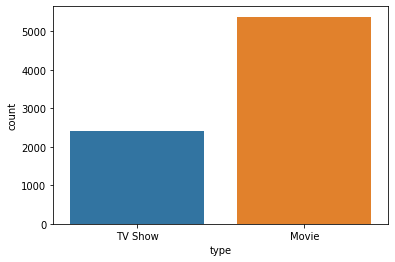

In [22]:
print(df['type'].value_counts()/ df.shape[0] )
##MOVIE --- 0.69
##TV_SHOW----0.31

sns.countplot(df['type'])

In [23]:
"""
ساختن گروه با type :
میانگین فیلم ها 2012 و شوی تلویزیونی 2016 است، اما نکته ی 
خیلی عجیب ماه 6 که به سمت تابستان میرود بیشترین
فیلم ها یا میانگینی از تمامی آنها ساخته شده است.

"""
df.groupby('type').mean()

,release_year,year_add,month_add
type,,,
Movie,"2,012.92","2,018.48",6.71
TV Show,"2,016.19","2,018.53",6.92


In [24]:
df.groupby(['type','rating']).agg(['mean'])

release_year year_add month_add
                         mean     mean      mean
type    rating                                  
Movie   G            1,998.41 2,018.41      5.44
        NC-17        2,015.00 2,017.33      6.00
        NR           2,010.56 2,016.58      6.53
        PG           2,008.94 2,018.95      6.23
        PG-13        2,009.32 2,019.10      6.80
        R            2,010.59 2,018.89      6.50
        TV-14        2,012.09 2,018.50      6.85
        TV-G         2,015.83 2,018.63      7.14
        TV-MA        2,015.71 2,018.29      6.62
        TV-PG        2,012.02 2,018.19      6.94
        TV-Y         2,017.20 2,018.75      8.29
        TV-Y7        2,015.44 2,018.12      6.07
        TV-Y7-FV     2,015.00 2,017.00      7.00
        UR           2,002.40 2,018.60      7.40
TV Show NR           2,011.60 2,016.80      4.80
        R            2,015.50 2,017.50      8.00
        TV-14        2,015.17 2,018.36      7.05
        TV-G         2,014.04 2,018.61      7.04
        TV-MA        2,017.55 2,018.75      6.76
        TV-PG        2,015.00 2,018.21      7.32
        TV-Y         2,016.74 2,018.80      7.16
        TV-Y7        2,014.82 2,018.20      6.43
        TV-Y7-FV     2,014.00 2,015.00      5.00

In [25]:
df['rating'].value_counts()

print(df['rating'].value_counts()/ df.shape[0] * 100)

TV-MA      36.86
TV-14      24.80
TV-PG      10.35
R           8.54
PG-13       4.96
TV-Y        3.60
TV-Y7       3.48
PG          3.17
TV-G        2.49
NR          1.08
G           0.50
TV-Y7-FV    0.08
UR          0.06
NC-17       0.04
Name: rating, dtype: float64


In [26]:
df.shape[0]

7787

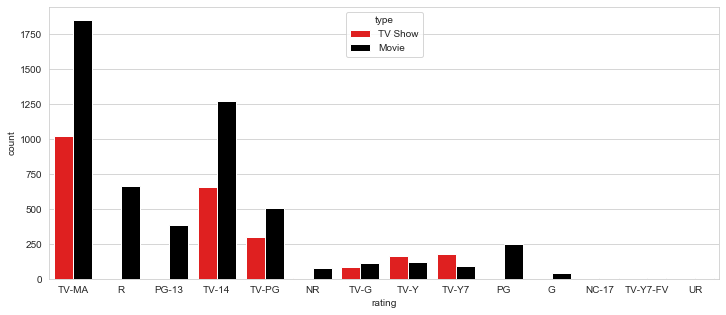

In [46]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='rating',data=df, hue='type',palette=['red','black'])

In [27]:
df[df['type']=='Movie'].sort_values(by='year_add',ascending=False)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Data_new_added,year_add,month_add,month_add_name
1919,s1920,Movie,Eddie Murphy: Raw,Robert Townsend,Eddie Murphy,United States,1987,R,90 min,Stand-Up Comedy,This stand-up comedy classic features Eddie Mu...,2021-01-01,2021,1,January
6769,s6770,Movie,The Polar Express,Robert Zemeckis,"Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona...",United States,2004,G,100 min,Children & Family Movies,"In this warm-hearted tale, a young boy's faith...",2021-01-01,2021,1,January
6697,s6698,Movie,The Naked Gun: From the Files of Police Squad!,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",United States,1988,PG-13,85 min,"Comedies, Cult Movies",Hapless cop Frank Drebin causes more problems ...,2021-01-01,2021,1,January
2493,s2494,Movie,GoodFellas,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",United States,1990,R,145 min,"Classic Movies, Dramas",Former mobster Henry Hill recounts his colorfu...,2021-01-01,2021,1,January
1004,s1005,Movie,BluffMaster!,Rohan Sippy,"Abhishek Bachchan, Priyanka Chopra, Riteish De...",India,2005,TV-14,129 min,"Comedies, International Movies, Romantic Movies",When his girlfriend learns the truth about his...,2021-01-08,2021,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,s5833,Movie,Strange Voices,Arthur Allan Seidelman,"Nancy McKeon, Valerie Harper, Stephen Macht, T...",United States,1987,TV-PG,96 min,Dramas,When their college-age daughter suddenly begin...,2011-10-01,2011,10,October
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010,11,November
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009,5,May
5765,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009,11,November


In [28]:
print(df[df['type']=='Movie']['country'].value_counts().head(5)/df.shape[0])
print('\n---------------------------------------------------')
print(df[df['type']=='TV Show']['country'].value_counts().head(5)/df.shape[0])

United States    0.27
India            0.11
United Kingdom   0.02
Canada           0.02
Spain            0.01
Name: country, dtype: float64

---------------------------------------------------
United States    0.13
United Kingdom   0.03
Japan            0.02
South Korea      0.02
India            0.01
Name: country, dtype: float64


from collections import Counter
Counter(df[df['type']=='Movie']['country','']).most_common(10)

In [30]:
###director

df['director'].value_counts().head(5)/df.shape[0]

NO DATA                  0.31
Raúl Campos, Jan Suter   0.00
Marcus Raboy             0.00
Jay Karas                0.00
Cathy Garcia-Molina      0.00
Name: director, dtype: float64

Text(0, 0.5, 'country')

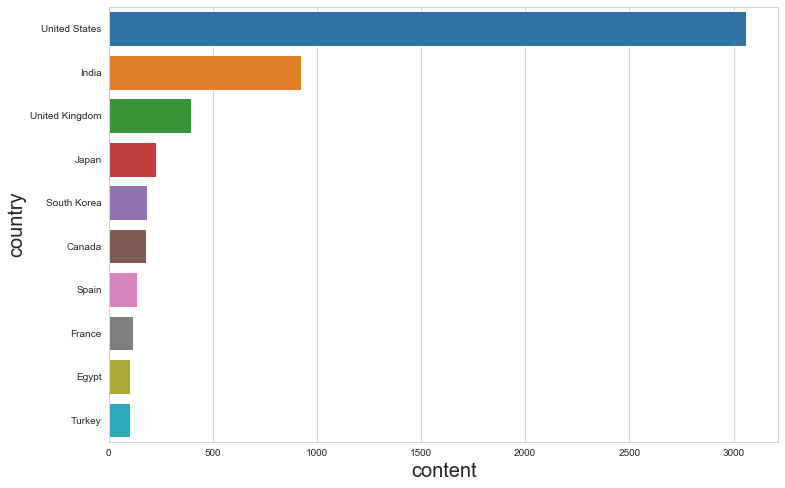

In [34]:
fig = plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
x = df['country'].value_counts().head(10)
ax = sns.barplot(x.values,x.index)
ax.set_xlabel('content',fontsize=20)
ax.set_ylabel('country',fontsize=20)

Text(0.5, 0, 'year')

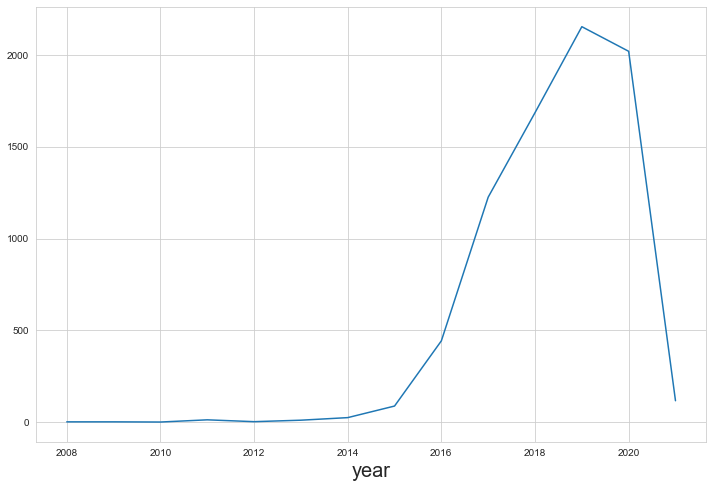

In [35]:
fig = plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
x = df['year_add'].value_counts()
ax = sns.lineplot(y=x.values,x =x.index)
ax.set_xlabel('year',fontsize=20)


Text(0, 0.5, 'direcector')

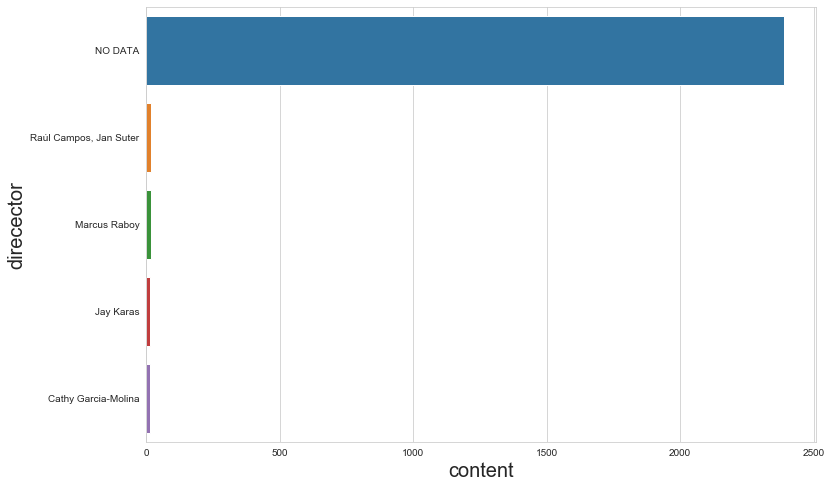

In [36]:
fig = plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
x = df['director'].value_counts().head(5)
ax = sns.barplot(x.values,x.index)
ax.set_xlabel('content',fontsize=20)
ax.set_ylabel('direcector',fontsize=20)

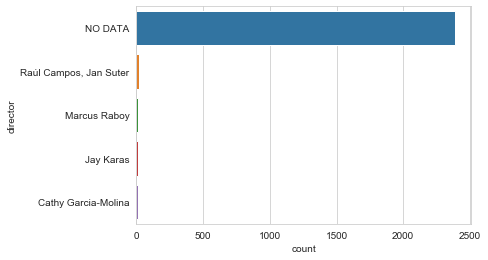

In [52]:
sns.countplot(y=df['director'],order = df['director'].value_counts().index[:5])

In [39]:
df['director'].value_counts().head(5)

NO DATA                   2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Name: director, dtype: int64

# Rating

In [41]:
df['rating'].value_counts()

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [55]:
df['listed_in'].value_counts()

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
                                                   ... 
Anime Series, Kids' TV, TV Action & Adventure         1
TV Action & Adventure                                 1
Kids' TV, TV Dramas, Teen TV Shows                    1
Kids' TV, TV Comedies, TV Sci-Fi & Fantasy            1
Comedies, Cult Movies, Independent Movies             1
Name: listed_in, Length: 492, dtype: int64

In [62]:
genra = df.listed_in.str.split(', ',expand=True).stack()

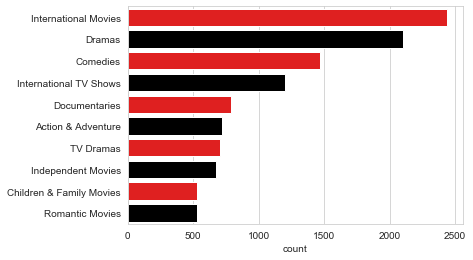

In [67]:
sns.countplot(y=genra,order=genra.value_counts().index[:10],palette=['red','black'])

In [72]:
genra.value_counts()/df.shape[0] * 100

International Movies           31.30
Dramas                         27.05
Comedies                       18.89
International TV Shows         15.40
Documentaries                  10.09
Action & Adventure              9.26
TV Dramas                       9.04
Independent Movies              8.64
Children & Family Movies        6.83
Romantic Movies                 6.82
TV Comedies                     6.74
Thrillers                       6.31
Crime TV Shows                  5.48
Kids' TV                        5.32
Docuseries                      4.53
Romantic TV Shows               4.28
Stand-Up Comedy                 4.22
Music & Musicals                4.12
Horror Movies                   4.01
British TV Shows                2.98
Reality TV                      2.85
Sci-Fi & Fantasy                2.80
Sports Movies                   2.52
TV Action & Adventure           1.93
Korean TV Shows                 1.93
Anime Series                    1.90
Spanish-Language TV Shows       1.89
C

In [76]:
df.groupby(df['type'])[genra]

KeyError: 'Columns not found: \'TV Sci-Fi & Fantasy\', \'Comedies\', \'Sports Movies\', \'Anime Features\', \'Movies\', \'Romantic Movies\', \'Thrillers\', \'Faith & Spirituality\', \'TV Thrillers\', \'Action & Adventure\', \'Cult Movies\', "Kids\' TV", \'British TV Shows\', \'Music & Musicals\', \'Stand-Up Comedy\', \'Classic & Cult TV\', \'International Movies\', \'International TV Shows\', \'Children & Family Movies\', \'Romantic TV Shows\', \'Horror Movies\', \'Sci-Fi & Fantasy\', \'Anime Series\', \'Korean TV Shows\', \'TV Horror\', \'Docuseries\', \'TV Dramas\', \'Classic Movies\', \'Teen TV Shows\', \'Documentaries\', \'Science & Nature TV\', \'Spanish-Language TV Shows\', \'Crime TV Shows\', \'TV Mysteries\', \'TV Shows\', \'Independent Movies\', \'LGBTQ Movies\', \'Dramas\', \'TV Action & Adventure\', \'Stand-Up Comedy & Talk Shows\', \'TV Comedies\', \'Reality TV\''

In [77]:
sort_data = df.sort_values("release_year", ascending = True)
sort_data[['title', "release_year"]][:10]

,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
7616,Why We Fight: The Battle of Russia,1943
7268,Tunisian Victory,1944
6699,The Negro Soldier,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
5371,San Pietro,1945
